In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity,pairwise_distances

In [2]:
file1 = pd.read_csv('AWCustomers.csv')
file2 = pd.read_csv('AWSales.csv')
# print(file1)
# print(file2)

In [3]:
new_file = pd.merge(file1, file2, on="CustomerID", how="left")
print(new_file)

       CustomerID Title FirstName MiddleName  LastName Suffix  \
0           21173   NaN      Chad          C      Yuan    NaN   
1           13249   NaN      Ryan        NaN     Perry    NaN   
2           29350   NaN     Julia        NaN  Thompson    NaN   
3           13503   NaN  Theodore        NaN     Gomez    NaN   
4           22803   NaN  Marshall          J      Shan    NaN   
...           ...   ...       ...        ...       ...    ...   
18356       25414   NaN     Grace          C    Bailey    NaN   
18357       11459   NaN     Tasha        NaN      Deng    NaN   
18358       12160   NaN    Jaclyn        NaN     Zhang    NaN   
18359       14353   NaN      Erin          I      Reed    NaN   
18360       16676   NaN    Amanda        NaN     Perry    NaN   

                 AddressLine1 AddressLine2            City  \
0          7090 C. Mount Hood          NaN      Wollongong   
1         3651 Willow Lake Rd          NaN         Shawnee   
2      1774 Tice Valley Blvd.    

In [4]:
print(new_file.isnull())

       CustomerID  Title  FirstName  MiddleName  LastName  Suffix  \
0           False   True      False       False     False    True   
1           False   True      False        True     False    True   
2           False   True      False        True     False    True   
3           False   True      False        True     False    True   
4           False   True      False       False     False    True   
...           ...    ...        ...         ...       ...     ...   
18356       False   True      False       False     False    True   
18357       False   True      False        True     False    True   
18358       False   True      False        True     False    True   
18359       False   True      False       False     False    True   
18360       False   True      False        True     False    True   

       AddressLine1  AddressLine2   City  StateProvinceName  ...  Gender  \
0             False          True  False              False  ...   False   
1             False

In [5]:
new_file.dtypes

CustomerID                int64
Title                    object
FirstName                object
MiddleName               object
LastName                 object
Suffix                   object
AddressLine1             object
AddressLine2             object
City                     object
StateProvinceName        object
CountryRegionName        object
PostalCode               object
PhoneNumber              object
BirthDate                object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
LastUpdated              object
BikeBuyer                 int64
AvgMonthSpend           float64
dtype: object

In [6]:
new_file = new_file.drop(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'PhoneNumber', 'LastUpdated', 'PostalCode'], axis=1)
print(new_file)

       CustomerID            City    StateProvinceName CountryRegionName  \
0           21173      Wollongong      New South Wales         Australia   
1           13249         Shawnee     British Columbia            Canada   
2           29350     West Covina           California     United States   
3           13503       Liverpool              England    United Kingdom   
4           22803           Werne  Nordrhein-Westfalen           Germany   
...           ...             ...                  ...               ...   
18356       25414        Coronado           California     United States   
18357       11459  Port Macquarie      New South Wales         Australia   
18358       12160       Beaverton               Oregon     United States   
18359       14353       Vancouver     British Columbia            Canada   
18360       16676       Grossmont           California     United States   

        BirthDate        Education      Occupation Gender MaritalStatus  \
0      1987-

In [7]:
new_file.describe(include="all")

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
count,18361.000000,18361,18361,18361,18361,18361,18361,18361,18361,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
unique,NaN,269,54,6,8230,5,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,London,California,United States,1987-05-14,Bachelors,Skilled Manual,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,420,4410,7770,11,5325,6059,9287,9947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20241.987092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610588,1.270301,0.338162,0.850389,72754.779642,0.551767,51.766744
std,5336.332731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487630,0.913989,0.568957,0.927315,30686.014313,0.497326,3.437684
min,11000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,25435.000000,0.000000,44.100000
25%,15621.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,53312.000000,0.000000,49.410000
50%,20248.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,61851.000000,1.000000,51.420000
75%,24863.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,2.000000,87410.000000,1.000000,53.590000


In [8]:
# Handling null values
new_file.isnull().sum()

CustomerID              0
City                    0
StateProvinceName       0
CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BikeBuyer               0
AvgMonthSpend           0
dtype: int64

In [9]:
# Normalization
new_file["Age"]=(pd.Timestamp('today')-pd.to_datetime(new_file["BirthDate"],dayfirst=True))//pd.Timedelta(days=365.2425)
new_file=new_file.drop('BirthDate',axis='columns')

C:\Users\Kapil Raghav\AppData\Local\Temp\ipykernel_1728\2924018389.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  new_file["Age"]=(pd.Timestamp('today')-pd.to_datetime(new_file["BirthDate"],dayfirst=True))//pd.Timedelta(days=365.2425)


In [10]:
bin_YearlyIncome=[25000,50000,75000,100000,125000,150000]
new_file['CatYearlyIncome']=pd.cut(new_file['YearlyIncome'],bins=bin_YearlyIncome)

bin_AvgMonthSpend=[44,50,56,62,68]
new_file['CatAvgMonthSpend']=pd.cut(new_file['AvgMonthSpend'],bins=bin_AvgMonthSpend)

bin_Age=[20,35,55,70,95]
new_file['CatAge']=pd.cut(new_file['Age'],bins=bin_Age)

new_file.describe(include='all')

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age,CatYearlyIncome,CatAvgMonthSpend,CatAge
count,18361.000000,18361,18361,18361,18361,18361,18361,18361,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361,18361,18361
unique,NaN,269,54,6,5,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4
top,NaN,London,California,United States,Bachelors,Skilled Manual,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(50000, 75000]","(50, 56]","(35, 55]"
freq,NaN,420,4410,7770,5325,6059,9287,9947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6059,10563,9921
mean,20241.987092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610588,1.270301,0.338162,0.850389,72754.779642,0.551767,51.766744,42.146452,NaN,NaN,NaN
std,5336.332731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487630,0.913989,0.568957,0.927315,30686.014313,0.497326,3.437684,11.260636,NaN,NaN,NaN
min,11000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,25435.000000,0.000000,44.100000,23.000000,NaN,NaN,NaN
25%,15621.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,53312.000000,0.000000,49.410000,33.000000,NaN,NaN,NaN
50%,20248.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,61851.000000,1.000000,51.420000,41.000000,NaN,NaN,NaN
75%,24863.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,2.000000,87410.000000,1.000000,53.590000,50.000000,NaN,NaN,NaN


In [11]:
new_file['YearlyIncome']=(new_file['YearlyIncome']-new_file['YearlyIncome'].mean())/new_file['YearlyIncome'].std()

new_file['AvgMonthSpend']=(new_file['AvgMonthSpend']-new_file['AvgMonthSpend'].mean())/new_file['AvgMonthSpend'].std()

new_file.describe(include='all')

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age,CatYearlyIncome,CatAvgMonthSpend,CatAge
count,18361.000000,18361,18361,18361,18361,18361,18361,18361,18361.000000,18361.000000,18361.000000,18361.000000,1.836100e+04,18361.000000,1.836100e+04,18361.000000,18361,18361,18361
unique,NaN,269,54,6,5,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4
top,NaN,London,California,United States,Bachelors,Skilled Manual,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(50000, 75000]","(50, 56]","(35, 55]"
freq,NaN,420,4410,7770,5325,6059,9287,9947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6059,10563,9921
mean,20241.987092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610588,1.270301,0.338162,0.850389,1.692091e-16,0.551767,7.731956e-16,42.146452,NaN,NaN,NaN
std,5336.332731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487630,0.913989,0.568957,0.927315,1.000000e+00,0.497326,1.000000e+00,11.260636,NaN,NaN,NaN
min,11000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.542063e+00,0.000000,-2.230206e+00,23.000000,NaN,NaN,NaN
25%,15621.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,-6.336039e-01,0.000000,-6.855616e-01,33.000000,NaN,NaN,NaN
50%,20248.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,-3.553339e-01,1.000000,-1.008656e-01,41.000000,NaN,NaN,NaN
75%,24863.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,2.000000,4.775863e-01,1.000000,5.303733e-01,50.000000,NaN,NaN,NaN


In [12]:
new_file=pd.get_dummies(new_file,columns=['Gender','MaritalStatus','TotalChildren'],drop_first=False,dtype=int)

new_file

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,...,CatAvgMonthSpend,CatAge,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,TotalChildren_0,TotalChildren_1,TotalChildren_2,TotalChildren_3
0,21173,Wollongong,New South Wales,Australia,Bachelors,Clerical,1,3,0,0.298547,...,"(50, 56]","(35, 55]",0,1,1,0,0,1,0,0
1,13249,Shawnee,British Columbia,Canada,Partial College,Clerical,1,2,1,0.271173,...,"(50, 56]","(35, 55]",0,1,1,0,0,0,1,0
2,29350,West Covina,California,United States,Bachelors,Clerical,0,3,0,0.444249,...,"(50, 56]","(35, 55]",1,0,0,1,1,0,0,0
3,13503,Liverpool,England,United Kingdom,Partial College,Skilled Manual,1,2,1,-0.367391,...,"(56, 62]","(35, 55]",0,1,1,0,0,0,1,0
4,22803,Werne,Nordrhein-Westfalen,Germany,Partial College,Skilled Manual,1,1,0,-0.682747,...,"(50, 56]","(35, 55]",0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,25414,Coronado,California,United States,Graduate Degree,Skilled Manual,0,1,0,-0.645303,...,"(44, 50]","(20, 35]",1,0,1,0,0,0,1,0
18357,11459,Port Macquarie,New South Wales,Australia,Bachelors,Skilled Manual,0,2,0,-0.383327,...,"(50, 56]","(20, 35]",1,0,0,1,1,0,0,0
18358,12160,Beaverton,Oregon,United States,Partial College,Skilled Manual,0,2,0,-0.680955,...,"(44, 50]","(35, 55]",1,0,0,1,1,0,0,0
18359,14353,Vancouver,British Columbia,Canada,High School,Clerical,0,0,0,0.469993,...,"(50, 56]","(20, 35]",1,0,0,1,1,0,0,0


In [13]:
#Jaccard Similarity
Jaccard_similarity=pd.DataFrame(1-pairwise_distances(new_file.T.to_numpy(),metric='jaccard'),index=new_file.columns,columns=new_file.columns)
print(Jaccard_similarity)

# Cosine Similarity
Cosine_similarity=pd.DataFrame(1-pairwise_distances((new_file['BikeBuyer'],new_file['YearlyIncome']),metric='cosine'))
print(Cosine_similarity)

                      CustomerID      City  StateProvinceName  \
CustomerID              1.000000  1.000000           1.000000   
City                    1.000000  1.000000           1.000000   
StateProvinceName       1.000000  1.000000           1.000000   
CountryRegionName       1.000000  1.000000           1.000000   
Education               1.000000  1.000000           1.000000   
Occupation              1.000000  1.000000           1.000000   
HomeOwnerFlag           0.610588  0.610588           0.610588   
NumberCarsOwned         0.786123  0.786123           0.786123   
NumberChildrenAtHome    0.289908  0.289908           0.289908   
YearlyIncome            1.000000  1.000000           1.000000   
BikeBuyer               0.551767  0.551767           0.551767   
AvgMonthSpend           1.000000  1.000000           1.000000   
Age                     1.000000  1.000000           1.000000   
CatYearlyIncome         1.000000  1.000000           1.000000   
CatAvgMonthSpend        1

c:\Users\Kapil Raghav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2350: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [14]:
new_file['BikeBuyer'].corr(new_file['YearlyIncome'])

0.24945696278096893

Estimated coefficients:
b_0 = 5.68493150684931    
b_1 = 0.863013698630137


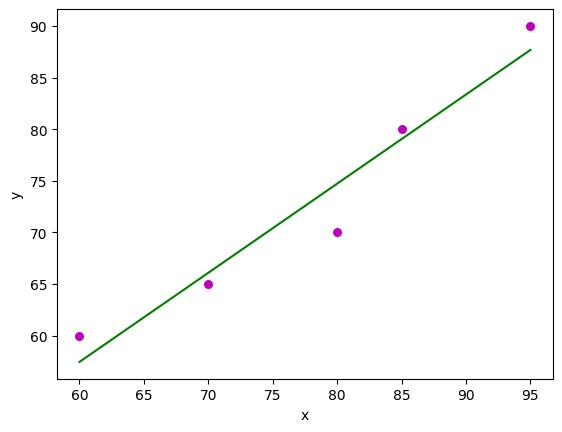

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def estimate_coefficients(x, y):
  n = np.size(x)
  # mean of x and y vector
  meanx = np.mean(x)
  meany = np.mean(y)
  SS_xy = np.sum(y*x) - n*meany*meanx;
  SS_xx = np.sum(x*x) - n*meanx*meanx;

  b_1 = SS_xy / SS_xx
  b_0 = meany - b_1*meanx

  return (b_0, b_1)

def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",
        marker = "o", s = 30)

  # predicted response vector
  y_pred = b[0] + b[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = "g")

  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')


def main():
  # observations / data
  x = np.array([95,85,80,70,60])
  y = np.array([90,80,70,65,60])

  # estimating coefficients
  b = estimate_coefficients(x, y)
  # print(b)
  print("Estimated coefficients:\nb_0 = {}  \
  \nb_1 = {}".format(b[0], b[1]))

  # plotting regression line
  plot_regression_line(x, y, b)


main()